Decision Tree Classification Accuracy: 0.7804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



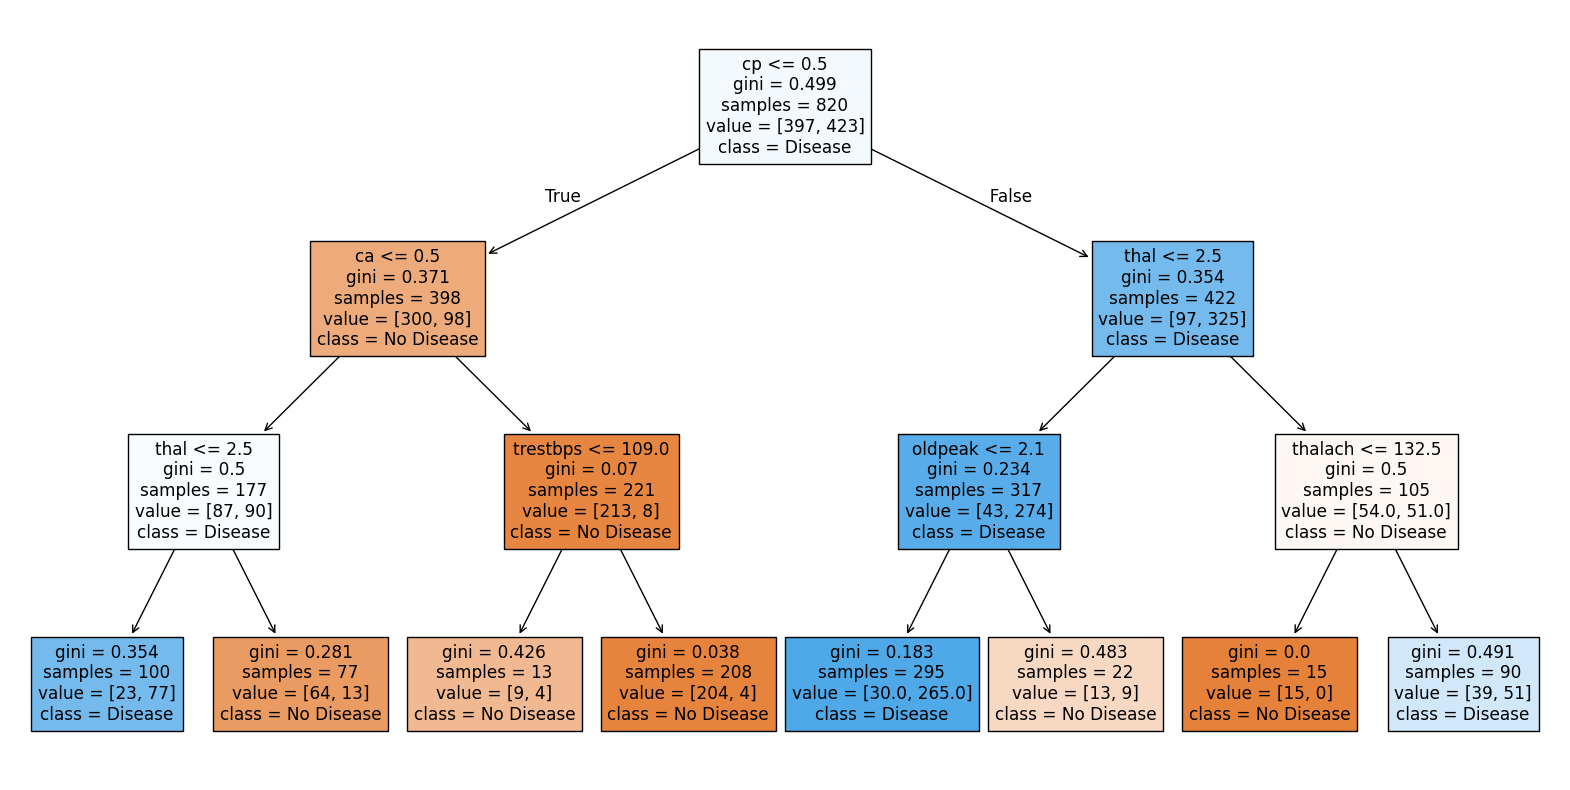

Random Forest Classification Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Feature Importance (Classification):
 cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64
Decision Tree Regression MSE: 53.38657295281151


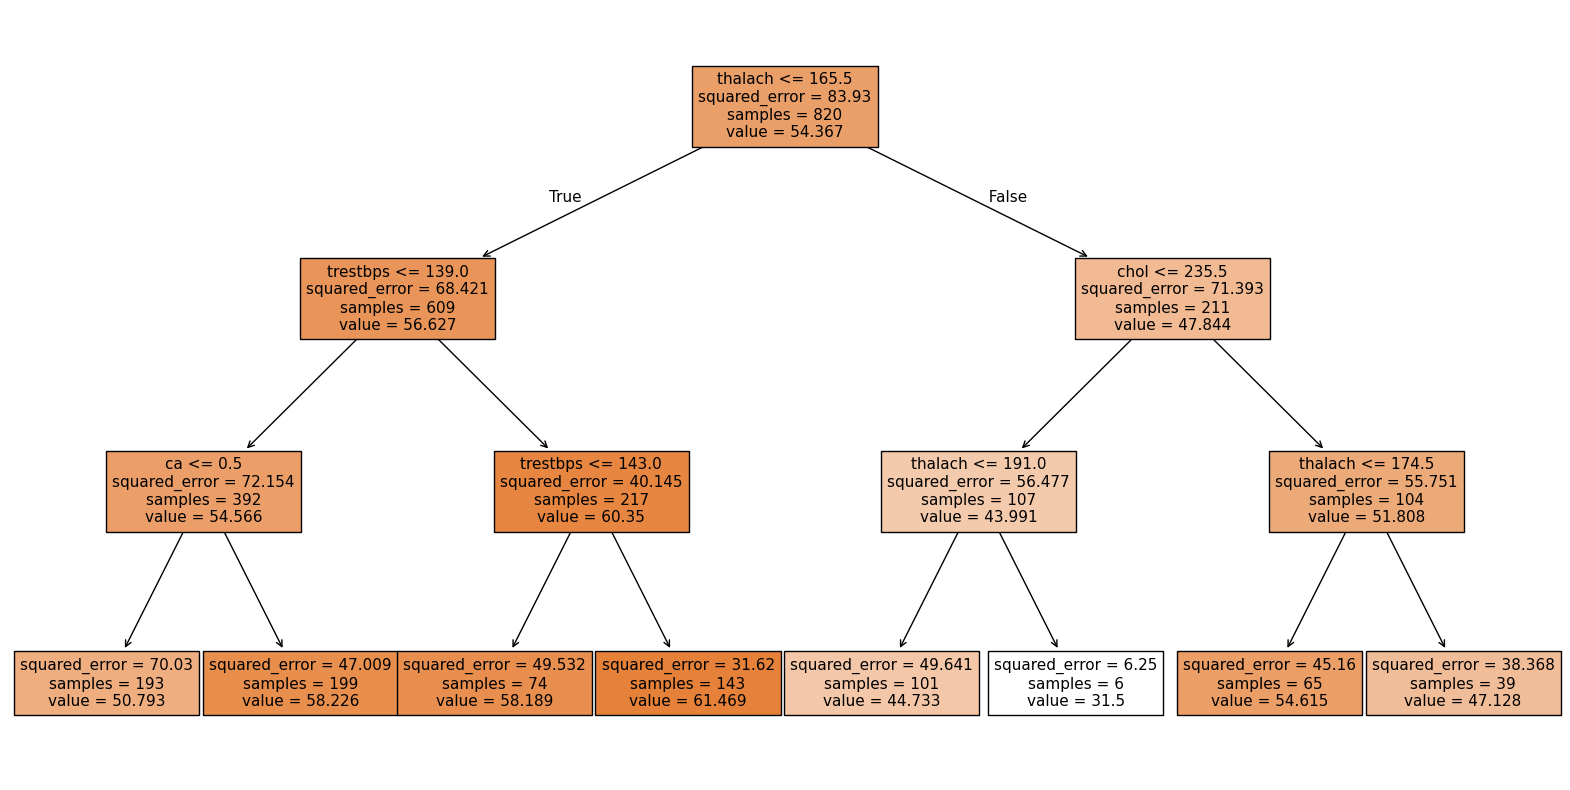

Random Forest Regression MSE: 3.959802926829268
Feature Importance (Regression):
 thalach     0.308993
chol        0.173179
trestbps    0.167912
ca          0.113768
oldpeak     0.101705
cp          0.038336
thal        0.020281
restecg     0.017915
exang       0.016580
sex         0.015977
slope       0.014804
fbs         0.010549
dtype: float64


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt

data = pd.read_csv('heart.csv')
data = data.dropna()


X_class = data.drop('target', axis=1)
y_class = data['target']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

dtree_class = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_class.fit(X_train_class, y_train_class)
y_pred_class = dtree_class.predict(X_test_class)
print("Decision Tree Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

plt.figure(figsize=(20,10))
plot_tree(dtree_class, feature_names=X_class.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class, y_train_class)
y_pred_rf_class = rf_class.predict(X_test_class)
print("Random Forest Classification Accuracy:", accuracy_score(y_test_class, y_pred_rf_class))
print("Classification Report:\n", classification_report(y_test_class, y_pred_rf_class))

importance_class = pd.Series(rf_class.feature_importances_, index=X_class.columns)
importance_class.sort_values(inplace=True, ascending=False)
print("Feature Importance (Classification):\n", importance_class)


X_reg = data.drop(['age', 'target'], axis=1)
y_reg = data['age']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

dtree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
dtree_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = dtree_reg.predict(X_test_reg)
print("Decision Tree Regression MSE:", mean_squared_error(y_test_reg, y_pred_reg))

plt.figure(figsize=(20,10))
plot_tree(dtree_reg, feature_names=X_reg.columns, filled=True)
plt.show()

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)
print("Random Forest Regression MSE:", mean_squared_error(y_test_reg, y_pred_rf_reg))

importance_reg = pd.Series(rf_reg.feature_importances_, index=X_reg.columns)
importance_reg.sort_values(inplace=True, ascending=False)
print("Feature Importance (Regression):\n", importance_reg)
